<a href="https://colab.research.google.com/github/ugoant/credit-card-fraud-detection/blob/main/CETM47Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import re
import numpy as np
import nltk
# importing necessary libraries
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from snowballstemmer import stemmer; sns.set()
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

data = fetch_20newsgroups()

news = data.target_names
#print(data)
print("......280")
print(news)




cat = ['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian', 'rec.autos', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', ]

remove = ("headers", "footers", "quote")

newsgroups_train = fetch_20newsgroups(subset='train', categories =cat, remove =remove, shuffle=True, random_state=42)
newsgroups_test = fetch_20newsgroups(subset='test', categories =cat, remove =remove, shuffle=True, random_state=42)


Test1 = (newsgroups_train.data[6])

print(Test1)

# Printing all the categories
print(newsgroups_train.target_names)




......280
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
In article <Apr18.194927.17048@yuma.ACNS.ColoState.EDU>
holland@CS.ColoState.EDU (douglas craig holland) writes: 
[...]
>	With E-Mail, if they can't break your PGP encryption, they'll just
>call up one of their TEMPEST trucks and read the electromagnetic emmisions
>from your computer or terminal.  Note that measures to protect yourself from
>TEMPEST surveillance are still classified, as far as I know.

I don't know about classified, but I do seem to remember that unless
you're authorized by the Govt, it's illegal to TEMPEST-shield your
equipment.  Besides, effective TEMPEST-shielding is mu

In [2]:
# Finding frequency of each category
targets, frequency = np.unique(newsgroups_train.target, return_counts=True)
targets, frequency 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 array([480, 584, 591, 590, 578, 593, 585, 594, 598, 597, 600, 595, 591,
        594, 599, 546, 564, 465]))

In [3]:
targets_str = np.array(newsgroups_train.target_names)
print(list(zip(targets_str, frequency)))

[('alt.atheism', 480), ('comp.graphics', 584), ('comp.os.ms-windows.misc', 591), ('comp.sys.ibm.pc.hardware', 590), ('comp.sys.mac.hardware', 578), ('comp.windows.x', 593), ('misc.forsale', 585), ('rec.autos', 594), ('rec.motorcycles', 598), ('rec.sport.baseball', 597), ('rec.sport.hockey', 600), ('sci.crypt', 595), ('sci.electronics', 591), ('sci.med', 594), ('soc.religion.christian', 599), ('talk.politics.guns', 546), ('talk.politics.mideast', 564), ('talk.politics.misc', 465)]


In [ ]:
print(newsgroups_train.filenames.shape)
print(newsgroups_train.target.shape)
print(newsgroups_train.target)

print(f"Array {newsgroups_train.target[:10]}")



for t in newsgroups_train.target[:10]:
       print(newsgroups_train.target_names[t])


#Importing the NLP
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()

count_vect = CountVectorizer()
tdidf_vect = TfidfVectorizer()

X_train_counts = count_vect.fit_transform(newsgroups_train.data)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
x2 = tdidf_vect.fit_transform(newsgroups_train.data)

print(X_train_counts)
print(".....")
print(x2)

print(count_vect.get_feature_names_out())
print(".....33")
print(tdidf_vect.get_feature_names_out())
print(".....34")
print(X_train_tfidf.shape)

print( f"Length of vocabulary: {len(count_vect.vocabulary_)}" ) # How big is our vocab


# For each sentence, what does the BoW look like.
for sent_num in range(0,len(Test1)):
    print(X_train_counts[sent_num].toarray())


#Importing the Classifier
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, newsgroups_train.target)

docs_new = ['God is love', 'OpenGL on the GPU is fast']
X_new_counts = count_vect.transform(docs_new)
X_new_tfidf = tfidf_transformer.transform(X_new_counts)

predicted = clf.predict(X_new_tfidf)

for doc, cat in zip(docs_new, predicted):
    print('%r => %s' % (doc, newsgroups_train.target_names[cat]))
    print(".....6")

#Building the Pipeline
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer(stop_words='english')),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB()),
])

text_clf = text_clf.fit(newsgroups_train.data, newsgroups_train.target)


docs_test = newsgroups_test.data
predicted = text_clf.predict(docs_test)
Acc = np.mean(predicted == newsgroups_test.target)
print(Acc)
print(".....7")

from sklearn import metrics
print(metrics.classification_report(newsgroups_test.target, predicted,
     target_names=newsgroups_test.target_names))

#Plotting Confusion Matrix
Conf = metrics.confusion_matrix(newsgroups_test.target, predicted)
print(Conf)
print(".....4")


from sklearn.pipeline import make_pipeline
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

model.fit(newsgroups_train.data, newsgroups_train.target)



labels =model.predict(newsgroups_test.data)
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(newsgroups_test.target,labels)
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False
            , xticklabels=newsgroups_train.target_names
            , yticklabels=newsgroups_train.target_names)

plt.xlabel("true label")
plt.ylabel("predicted label")






# Stemming Code

from nltk.stem import PorterStemmer

stemmer =  PorterStemmer()


class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: ([stemmer.stem(w) for w in analyzer(doc)])
    
stemmed_count_vect = StemmedCountVectorizer(stop_words='english')

text_mnb_stemmed = Pipeline([('vect', stemmed_count_vect), ('tfidf', TfidfTransformer()), 
                             ('mnb', MultinomialNB())])

text_mnb_stemmed = text_mnb_stemmed.fit(newsgroups_train.data, newsgroups_train.target)

predicted_mnb_stemmed = text_mnb_stemmed.predict(newsgroups_test.data)

Acc2 = np.mean(predicted_mnb_stemmed == newsgroups_test.target)
print(Acc2)



                          precision    recall  f1-score   support

             alt.atheism       0.94      0.51      0.66       319
           comp.graphics       0.75      0.75      0.75       389
 comp.os.ms-windows.misc       0.73      0.66      0.70       394
comp.sys.ibm.pc.hardware       0.64      0.77      0.70       392
   comp.sys.mac.hardware       0.81      0.76      0.78       385
          comp.windows.x       0.87      0.77      0.82       395
            misc.forsale       0.90      0.71      0.79       390
               rec.autos       0.87      0.89      0.88       396
         rec.motorcycles       0.91      0.88      0.90       398
      rec.sport.baseball       0.95      0.89      0.92       397
        rec.sport.hockey       0.87      0.95      0.91       399
               sci.crypt       0.66      0.93      0.77       396
         sci.electronics       0.81      0.64      0.72       393
                 sci.med       0.93      0.82      0.87       396
  soc.rel

Text(147.50000000000003, 0.5, 'predicted label2')

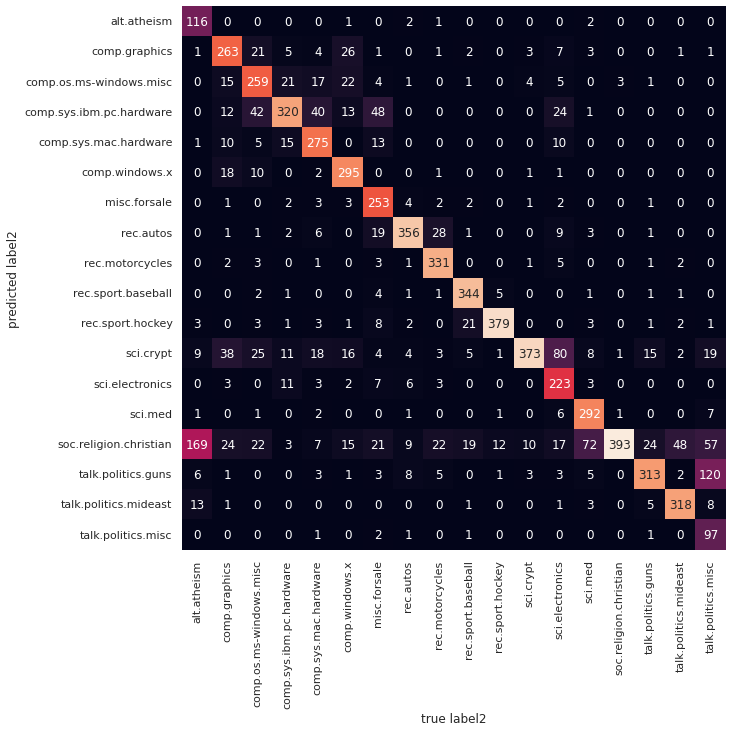

In [ ]:
print(metrics.classification_report(newsgroups_test.target, predicted_mnb_stemmed,
     target_names=newsgroups_test.target_names))


#Plotting Confusion Matrix
Conf2 = metrics.confusion_matrix(newsgroups_test.target, predicted_mnb_stemmed)
print(Conf2)

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

model.fit(newsgroups_train.data, newsgroups_train.target)


labels =model.predict(newsgroups_test.data)
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(newsgroups_test.target, labels)
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False
            , xticklabels=newsgroups_train.target_names
            , yticklabels=newsgroups_train.target_names)

plt.xlabel("true label2")
plt.ylabel("predicted label2")
